# Template Validation: TMP024-CTS Version 01

Visional Technology, SRL \
Engineering laboratory \
Validated by: *José Abrahan Alfaro Alvarado*, S&A Engineer \
Validation date: July 05, 2023 \
Approved by:

## General objective:
* Perform extensive spreadsheet validation to ensure data quality, integrity, and accuracy.

# Information about Python and Jupyter for validations

Using Pandas and its associated libraries offers numerous advantages and benefits when performing spreadsheet validation. Some of the reasons why it is important to use Pandas are:

1. Efficient data manipulation and analysis: 

Pandas provides a powerful and efficient data structure called DataFrame, which allows for handling and manipulating large data sets easily and efficiently. This makes it easier to process and analyze spreadsheet data faster and more efficiently than traditional spreadsheet tools.

2. *Specialized functions and methods*:

Pandas offers a wide range of specialized functions and methods for data manipulation and analysis. This includes functions to filter, sort, group, transform, and perform statistical calculations on the data. These capabilities allow you to perform complex tasks simply and effectively.

3. *Handling missing data*:

Pandas has specific functionality to deal with missing data or null values in the spreadsheet. Provides methods to detect, filter, and fill in missing values, which helps ensure data integrity and prevent analysis errors.

4. *Integration with other libraries*:

Pandas integrates closely with other popular Python libraries, such as NumPy and Matplotlib. This allows you to perform advanced statistical and numerical analysis, as well as generate visualizations and graphs of the data in a simple and consistent way.

5. *Automation and scalability*:

By using Pandas, much of the spreadsheet validation process can be automated. This saves time and effort, especially when working with large spreadsheets or needing to perform validation on a recurring basis.

In summary, using Pandas and its associated libraries provides a series of specialized tools and functionality for managing, processing, and analyzing data in a spreadsheet. These capabilities improve the efficiency, accuracy, and scalability of validation, resulting in a more effective and reliable process.

# Importing the libraries required for validation

The *NumPy* and *Pandas* libraries allow the Python programming language to be much more efficient from a computational point of view when doing numerical calculations and handling large data sets.

In [1]:
# Se importan las bibliotecas respectivas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# Function to apply styles to the background of the cells
def highlight_cells(value):
    if 'True' in str(value):
        return 'background-color: limegreen'
    elif 'False' in str(value):
        return 'background-color: indianred'
    else:
        return ''

## Validation of the sheet called: *PSPF_Test_Uncertainty*
### Theory:
*Test uncertainty calculation according to:
Geometrical product specifications (GPS) — Guidelines for the evaluation of coordinate measuring machine (CMM) test uncertainty for CMMs using single and multiple stylus contacting probing systems (ISO/TS 17865:2016)*

The recommended formula for the standard uncertainty of the form probing $u(P_F)$ error is:


$$ 
u(P_F) = \sqrt{\left( \dfrac{F_{sphere}}{2} \right)^2 + u^2(F_{sphere}) + \left( \dfrac{d_{fixturing}}{2} \right)^2}
$$
where:
* $ F_{sphere} $, is the form of the test sphere;
* $ u(F_{sphere}) $, is the standard uncertainty in the form of the test sphere stated in the calibration certificate;
* $ d_{fixturing} $, is the displacement due to the probing force.

The one-sided nature of this test means that the typical 95 \% confidence level is achieved with a coverage factor of $k$ = 1,645 instead of the usual $k$ = 2 (the default value given in ISO 14253-1:, Clause 4), which applies to two-sided distributions.

The recommended formula for the standard uncertainty of the size probing error is:

$$ 
u(P_S) = \sqrt{u^2(D_{Cal}) + \left[\alpha\cdot u(T)\cdot D_{Cal} \right]^2 + \left[\Delta T\cdot u(\alpha)\cdot D_{Cal} \right]^2 + \left( \dfrac{F_{sphere}}{4} \right)^2 + \left[ \dfrac{u(F_{sphere})}{2}\right]^2 + \left( \dfrac{d_{fixturing}}{2} \right)^2 }
$$
where:
* $D_{Cal} $, is the calibrated diameter of the test sphere;
* $u(D_{Cal})$, is the standard uncertainty in the calibrated diameter of the test sphere;
* $\alpha$, is the CTE of the test sphere material;
* $u(\alpha)$, is the standard uncertainty in the CTE of the test sphere material;
* $\Delta T$, is the temperature of the test sphere minus 20 °C;
* $u(T)$, is the standard uncertainty of the temperature of the test sphere;
* $F_{sphere}$, is the form of the test sphere;
* $u(F_{sphere})$, is the standard uncertainty in the form of the test sphere stated in the calibration certificate;
* $d_{fixturing}$, is the displacement due to the probing force.

### Defining the uncertainty functions

In [3]:
# Define the function that calculates the uncertainty due to the error of form u_PF
def u_PF(Fsphere, u_Fsphere, d_fixturing,u_repe, u_repr):
    '''
    Returns the value of the standard uncertainty due to form error and its respective expanded uncertainty (k=1.645).
    
    Input:
    - Fsphere: is the form of the test sphere;
    - u_Fsphere: is the standard uncertainty in the form of the test sphere stated in the calibration certificate;
    - d_fixturing: is the displacement due to the probing force.
    
    
    Output: 
    - u_PF: combined standard uncertainty of the error of form;
    - U_PF: expanded uncertainty of the error of form.
    '''
    
    # The equation that governs this uncertainty is defined is
    u_PF = np.sqrt((Fsphere/2)**2 + u_Fsphere**2 + (d_fixturing/2)**2 + u_repe**2 + u_repr**2) # [mm]
    # And the expanded uncertainty
    U_PF = 1.645*u_PF
    
    return(u_PF, U_PF)

In [4]:
# Define the function that calculates the uncertainty due to the error of form u_PS
def u_PS(u_D_cal, alpha, u_T, D_cal, deltaT, u_alpha, Fsphere, u_Fsphere, d_fixturing, u_repe, u_repr):
    '''
    Returns the value of the standard uncertainty due to size error and its respective expanded uncertainty (k=2).
    
    Input:
    - u_D_cal: is the standard uncertainty in the calibrated diameter of the test sphere;
    - alpha: is the CTE of the test sphere material;
    - u_T: is the standard uncertainty of the temperature of the test sphere;
    - D_cal: is the calibrated diameter of the test sphere;
    - deltaT: is the temperature of the test sphere minus 20 °C;
    - u_alpha: is the standard uncertainty in the CTE of the test sphere material;
    - Fsphere: is the form of the test sphere;
    - u_Fsphere: is the standard uncertainty in the form of the test sphere stated in the calibration certificate;
    - d_fixturing: is the displacement due to the probing force.
    
    
    Output: 
    - u_PS: combined standard uncertainty of the error of size;
    - U_PS: expanded uncertainty of the error of size.
    '''
    u_PS = np.sqrt(u_D_cal**2+(alpha*u_T*D_cal)**2+(deltaT*u_alpha*D_cal)**2+(Fsphere/4)**2+(u_Fsphere/2)**2+(d_fixturing/2)**2 + u_repe**2 + u_repr**2)
    U_PS = 2*u_PS
    return(u_PS, U_PS)

### Call to template location and sheet *PSPD_Input_Parameters*

In [5]:
# 1) Path of the excel file of the template
path = r'C:\Users\jchac\OneDrive\Escritorio\Programación\Validación de hojas de cálculo\TMP024\VT-CAL-061323-213365 new JAlfaro.xlsx'

#2) Define the DataFrame of the raw data
df_PSPF_raw = pd.read_excel(path, sheet_name='PSPF_Input_Parameters')

In [6]:
# Define the variables for the quantification of the standard uncertainty due to shape and size error
roundness = df_PSPF_raw["Unnamed: 1"][15] # [µm]
U_roundness = df_PSPF_raw["Unnamed: 1"][16] # [µm]
Fsphere = 1.25*roundness/1000 # [mm]
u_Fsphere = 1.25*U_roundness/2000  # [mm]
d_fixturing = 0.0 # is estimated as zero [mm]
T_i = df_PSPF_raw["Unnamed: 1"][19] # [°C]
T_f = df_PSPF_raw["Unnamed: 1"][20] # [°C]
u_D_cal = df_PSPF_raw["Unnamed: 1"][13]/2000 # [mm]
alpha = df_PSPF_raw["Unnamed: 1"][5]*0.000001 # [1/K]
u_T = df_PSPF_raw["Unnamed: 1"][24]/2 # [K]  
D_cal = df_PSPF_raw["Unnamed: 1"][12] # [mm]
deltaT = (T_i + T_f)/2 - 20 # # [K]
u_alpha = df_PSPF_raw["Unnamed: 1"][6]*0.000001/np.sqrt(3) # [1/K]

# Repeatibility & Reproducibility (from the tests)
u_repe_PF, u_repro_PF = 0.000182818990625519, 0.000447813242323182 # [mm]
u_repe_PS, u_repro_PS = 0.0000720647856677125, 0.00017652195330893 # [mm]

# Function call and definition of the Python uncertainties
uncer_PF, Uncer_PF = u_PF(Fsphere, u_Fsphere, d_fixturing, u_repe_PF, u_repro_PF)
uncer_PS, Uncer_PS = u_PS(u_D_cal, alpha, u_T, D_cal, deltaT, u_alpha, Fsphere, u_Fsphere, d_fixturing, u_repe_PS, u_repro_PS)

### Uncertainty weights graph for: $u(P_F)$ and $u(P_S)$

In [7]:
def uncertainty_color(categories, weights, ax):
    data = {'Category': categories, 'Weights (µm)': weights}
    df = pd.DataFrame(data)
    colors = list(mcolors.TABLEAU_COLORS.values())
    # Assign colors to bars based on weights
    for i, weight in enumerate(df['Weights (µm)']):
        color = colors[i % len(colors)]  # Selecciona un color de la paleta
        ax.bar(df['Category'][i], weight, color=color)

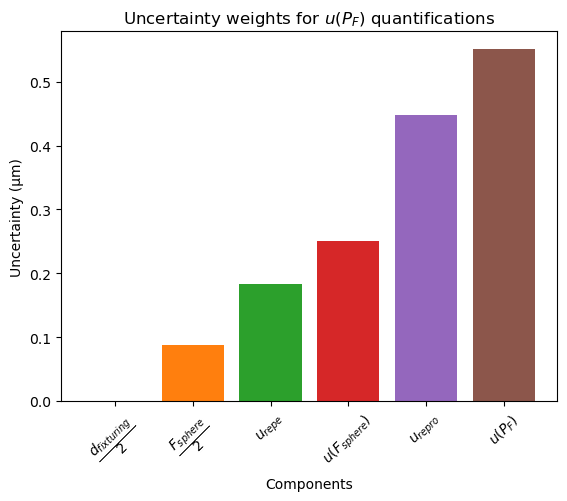

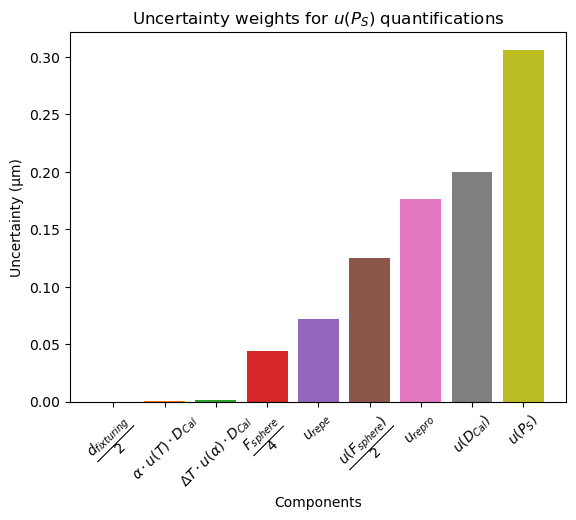

In [8]:
categories_PF = [r'$\dfrac{d_{fixturing}}{2}$', r'$\dfrac{F_{sphere}}{2}$',r'$u_{repe}$', r'$u(F_{sphere})$', r'$u_{repro}$', r'$u(P_F)$']

weights_PF = [1e3*d_fixturing/2, 1e3*Fsphere/2, 1e3*u_repe_PF, 1e3*u_Fsphere, 1e3*u_repro_PF, 1e3*uncer_PF]

fig, ax_PF = plt.subplots()
uncertainty_color(categories_PF, weights_PF, ax_PF)
ax_PF.set_xlabel('Components')
ax_PF.set_ylabel('Uncertainty (µm)')
ax_PF.set_title('Uncertainty weights for '+r'$u(P_F)$'+' quantifications')
plt.xticks(rotation=45)
plt.show()

categories_PS = [r'$\dfrac{d_{fixturing}}{2}$', r'$\alpha\cdot u(T)\cdot D_{Cal}$', r'$\Delta T\cdot u(\alpha)\cdot D_{Cal}$',
        r'$\dfrac{F_{sphere}}{4}$',r'$u_{repe}$' ,r'$\dfrac{u(F_{sphere})}{2}$', r'$u_{repro}$', r'$u(D_{Cal})$', r'$u(P_S)$']

weights_PS = [1e3*d_fixturing/2, 1e3*alpha*u_T*D_cal, 1e3*deltaT*u_alpha*D_cal, 
              1e3*Fsphere/4, 1e3*u_repe_PS,1e3*u_Fsphere/2, 1e3*u_repro_PS, 1e3*u_D_cal, 1e3*uncer_PS]

fig, ax_PS = plt.subplots()
uncertainty_color(categories_PS, weights_PS, ax_PS)
ax_PS.set_xlabel('Components')
ax_PS.set_ylabel('Uncertainty (µm)')
ax_PS.set_title('Uncertainty weights for '+r'$u(P_S)$'+' quantifications')
plt.xticks(rotation=45)
plt.show()

### Call to template location and sheet *PSPF_Test_Uncertainty*

In [9]:
# 1) Path of the excel file of the template
path = r'C:\Users\jchac\OneDrive\Escritorio\Programación\Validación de hojas de cálculo\TMP024\VT-CAL-061323-213365 new JAlfaro.xlsx'

#2) Define the DataFrame of the raw data
df_PSPF_TU = pd.read_excel(path, sheet_name='PSPF_Test_Uncertainty')

# Define Excel uncertainties
uncer_PF_Excel = df_PSPF_TU["Unnamed: 1"][22]
Uncer_PF_Excel = df_PSPF_TU["Unnamed: 1"][26]
uncer_PS_Excel = df_PSPF_TU["Unnamed: 1"][50]
Uncer_PS_Excel = df_PSPF_TU["Unnamed: 1"][54]

### Comparison of validation results

In [10]:
# Creation of the report DataFrame
df = pd.DataFrame({
    "Value to validate": [r"$u_{P_{F}}$ / mm",r"$U_{P_{F}}$ / mm",r"$u_{P_{S}}$ / mm",r"$U_{P_{S}}$ / mm"],
    "Excel": [uncer_PF_Excel, Uncer_PF_Excel, uncer_PS_Excel, Uncer_PS_Excel],
    "Python": [uncer_PF, Uncer_PF, uncer_PS_Excel, Uncer_PS_Excel]})

df_val = pd.DataFrame({"Are equal?": [round(df["Excel"][0],10) == round(df["Python"][0],10), round(df["Excel"][1],10) == round(df["Python"][1],10), df["Excel"][2] == df["Python"][2], df["Excel"][3] == df["Python"][3]]})

df["Are equal?"] = df_val.values.copy()

# Apply styles to the DataFrame
styled_df_PPSPF_TU_Validation = df.style.applymap(highlight_cells)

# Display the DataFrame with styles
styled_df_PPSPF_TU_Validation

,Value to validate,Excel,Python,Are equal?
0,$u_{P_{F}}$ / mm,0.000551,0.000551,True
1,$U_{P_{F}}$ / mm,0.000907,0.000907,True
2,$u_{P_{S}}$ / mm,0.000306,0.000306,True
3,$U_{P_{S}}$ / mm,0.000613,0.000613,True


## Validation of the sheet called: *SDE_Input_Measurements*

In this case, the operations that allow calculating the deviation between the nominal value and the measured value, referring to the distances between the spheres in the Acceptance, are validated. The procedure for the validation of the calculations is presented schematically below.

### Procedure
* The TMP024-CTS is called to the source folder together with all its data,
* Said sheet is refined a bit, to avoid handling information that is not of interest,
* Conditionals are evaluated to verify that the computation is being performed correctly,
* A DataFrame is created with the conditional values that allow to verify the validity of the results.

### Call to the template location and sheet *SDE_Input_Measurements*

In [11]:
# 1) Path of the excel file of the template
path = r'C:\Users\jchac\OneDrive\Escritorio\Programación\Validación de hojas de cálculo\TMP024\VT-CAL-061323-213365 new JAlfaro.xlsx'

#2) Define the DataFrame
df_SD_raw = pd.read_excel(path, sheet_name='SDE_Input_Measurements')

### Sheet debugging

In [12]:
#3) The sheet is debugged to get the values I want.
v

# Delete the row that was used as headers.
df_SD.drop(2, inplace=True)

# Remove rows and columns that don't interest me.
#-->Remember that I changed the headers for ease<--
df_SD.drop([0,1], inplace=True)
df_SD.drop([38,39,40], inplace=True)
df_SD.drop(df_SD.columns[8:], axis=1, inplace=True)
df_SD

2,Characteristic,Nominal,Actual 1,Deviation 1,Actual 2,Deviation 2,Actual 3,Deviation 3
3,SD1_15,10.3052,10.304783,-0.000417,10.304924,-0.000276,10.304898,-0.000302
4,SD1_22,29.9888,29.988098,-0.000702,29.988421,-0.000379,29.988327,-0.000473
5,SD1_8,56.5253,56.525234,-0.000066,56.525574,0.000274,56.525514,0.000214
6,SD15_22,19.7096,19.709298,-0.000302,19.709481,-0.000119,19.709407,-0.000193
7,SD15_8,47.1967,47.196759,0.000059,47.19696,0.00026,47.196899,0.000199
8,SD3_16,10.2442,10.244183,-0.000017,10.244091,-0.000109,10.244105,-0.000095
9,SD3_22,29.9433,29.94338,0.00008,29.943486,0.000186,29.943453,0.000153
10,SD3_10,56.5139,56.514602,0.000702,56.514806,0.000906,56.514798,0.000898
11,SD16_22,19.7203,19.720349,0.000049,19.720536,0.000236,19.72049,0.00019
12,SD16_10,47.1993,47.199669,0.000369,47.199905,0.000605,47.199888,0.000588


### Evaluation of conditionals

In [13]:
# Three variables are created that contain the information of each column to be evaluated.
# It is evaluated if the subtractions between the measured value and the nominal value coincide with the deviation values.
val_Des_1 = df_SD['Deviation 1'] == df_SD['Actual 1'] - df_SD['Nominal']
val_Des_2 = df_SD['Deviation 2'] == df_SD['Actual 2'] - df_SD['Nominal']
val_Des_3 = df_SD['Deviation 3'] == df_SD['Actual 3'] - df_SD['Nominal']

# Evaluate if all rows are TRUE
bool_val_Des_1 = all(val_Des_1)
bool_val_Des_2 = all(val_Des_2)
bool_val_Des_3 = all(val_Des_3)

# The columns are evaluated to be TRUE
test_SD = [bool_val_Des_1, bool_val_Des_2, bool_val_Des_3]

# A message is printed on the console indicating the veracity of the results.
print('All deviations are calculated correctly?' '\n' + str(all(test_SD)))

All deviations are calculated correctly?
True


### Validation of the maximum SD calculation

In [14]:
# The SD reported by Zeiss is the maximum value found in all deviations
Des_1_max = np.max(df_SD['Deviation 1'])
Des_2_max = np.max(df_SD['Deviation 2'])
Des_3_max = np.max(df_SD['Deviation 3'])
max_total = np.max([Des_1_max, Des_2_max, Des_3_max])

Des_1_min = np.min(df_SD['Deviation 1'])
Des_2_min = np.min(df_SD['Deviation 2'])
Des_3_min = np.min(df_SD['Deviation 3'])
min_total = np.min([Des_1_min, Des_2_min, Des_3_min])

if np.abs(max_total) > np.abs(min_total):
    sd_reported = max_total
else:
    sd_reported = min_total
    
print('The largest SD corresponds to: ' + str(round(sd_reported*1000, 2)) + ' um')

The largest SD corresponds to: 1.05 um


### Creation of the Data Frame

In [15]:
# The DataFrame is created following the syntax of the Pandas library.
charac = pd.DataFrame(df_SD['Characteristic'], columns =['Characteristic'], dtype = str)
validation_Des_1 = pd.DataFrame(val_Des_1, columns =["Is Actual 1 - Nominal = Deviation 1?"], dtype = str)
validation_Des_2 = pd.DataFrame(val_Des_2, columns =["Is Actual 2 - Nominal = Deviation 2?"], dtype = str)
validation_Des_3 = pd.DataFrame(val_Des_3, columns =["Is Actual 3 - Nominal = Deviation 3?"], dtype = str)

SD_Validation = charac.reset_index(drop=True).copy()
SD_Validation["Is Actual 1 - Nominal = Deviation 1?"] = validation_Des_1.values.copy()
SD_Validation["Is Actual 2 - Nominal = Deviation 2?"] = validation_Des_2.values.copy()
SD_Validation["Is Actual 3 - Nominal = Deviation 3?"] = validation_Des_3.values.copy()


SD_Validation_color = SD_Validation.style.applymap(highlight_cells)

SD_Validation_color

,Characteristic,Is Actual 1 - Nominal = Deviation 1?,Is Actual 2 - Nominal = Deviation 2?,Is Actual 3 - Nominal = Deviation 3?
0,SD1_15,True,True,True
1,SD1_22,True,True,True
2,SD1_8,True,True,True
3,SD15_22,True,True,True
4,SD15_8,True,True,True
5,SD3_16,True,True,True
6,SD3_22,True,True,True
7,SD3_10,True,True,True
8,SD16_22,True,True,True
9,SD16_10,True,True,True


# Validation of the sheet called: *SD_Graph*

In this case, the operations that allow calculating the maximum deviation between the nominal value and the measured value, referring to the distances between the spheres in the Acceptance, are validated. The procedure for the validation of the calculations is presented schematically below.

## Procedure
* Said sheet is refined a bit, to avoid handling information that is not of interest,
* The parameters are evaluated in a similar way to Excel to verify that the calculation is being carried out correctly,
* A DataFrame is created with the conditional values that allow to verify the validity of the results.

### Call to the location of the template and to the sheet *SD_Graph*

In [16]:
# 1) Path of the excel file of the template
path = r'C:\Users\jchac\OneDrive\Escritorio\Programación\Validación de hojas de cálculo\TMP024\VT-CAL-061323-213365 new JAlfaro.xlsx'

#2) Define the DataFrame
df_SD_Graph_raw = pd.read_excel(path, sheet_name='SD_Graph',header=0)

### Sheet debugging

In [17]:
#3) The sheet is debugged to get the values I want.
df_SD_Graph = df_SD_Graph_raw
df_SD_Graph.drop(df_SD_Graph.columns[0:16], axis=1, inplace=True)

# Define the new headers that are in row 2.
df_SD_Graph = df_SD_Graph.set_axis(df_SD_Graph.iloc[4], axis=1)

# Delete the row that was used as headers.
df_SD_Graph.drop(4, inplace=True)

# Remove rows and columns that don't interest me.
df_SD_Graph.drop([0,1,2,3], inplace=True)
df_SD_Graph.drop([33,35,42], inplace=True)

### Parameter evaluation

In [18]:
# Generate the array that will contain the maximum permissible errors of the SD Test
MPE = pd.DataFrame(4*np.ones(len(df_SD_Graph['x'])))

# Definition and reset of indexes
meas_1 = df_SD_Graph['1st measurement'].reset_index(drop=True)
meas_2 = df_SD_Graph['2nd measurement'].reset_index(drop=True)
meas_3 = df_SD_Graph['3rd measurement'].reset_index(drop=True)
nominal = df_SD_Graph['x'].reset_index(drop=True)

# Calculation of indicators
ks1 = np.abs(meas_1) - (MPE[0] + nominal/100)
ks2 = np.abs(meas_2) - (MPE[0] + nominal/100)
ks3 = np.abs(meas_3) - (MPE[0] + nominal/100)

#----------------------------------------------

# Three variables are created that contain the information of each column to be evaluated.
# Evaluates whether the ksi values in Excel match those calculated by Python.
# For the function to work correctly, we must reset the indices
val_ks1 = df_SD_Graph['ks1'].reset_index(drop=True) == ks1
val_ks2 = df_SD_Graph['ks2'].reset_index(drop=True) == ks2
val_ks3 = df_SD_Graph['ks3'].reset_index(drop=True) == ks3

# Evaluate if all rows are TRUE
bool_val_ks1 = all(val_ks1)
bool_val_ks2 = all(val_ks2)
bool_val_ks3 = all(val_ks3)

# The columns are evaluated to be TRUE
test_ksi = [bool_val_ks1, bool_val_ks2, bool_val_ks3]

# A message is printed on the console indicating the veracity of the results.
print('Are all the ksi calculated correctly?' '\n' + str(all(test_ksi)))

Are all the ksi calculated correctly?
True


### Creation of the DataFrame

In [19]:
# The DataFrame is created following the syntax of the Pandas library.
charac = pd.DataFrame(df_SD['Characteristic'], columns =['Characteristic'], dtype = str)
validation_ks1 = pd.DataFrame(val_ks1, columns =["Is ks1 of TMP024 = ks1 of Python?"], dtype = str)
validation_ks2 = pd.DataFrame(val_ks2, columns =["Is ks2 of TMP024 = ks2 of Python?"], dtype = str)
validation_ks3 = pd.DataFrame(val_ks3, columns =["Is ks3 of TMP024 = ks3 of Python?"], dtype = str)

ksi_Validation = charac.reset_index(drop=True).copy()
ksi_Validation["Is ks1 of TMP024 = ks1 of Python?"] = validation_ks1.values.copy()
ksi_Validation["Is ks2 of TMP024 = ks2 of Python?"] = validation_ks2.values.copy()
ksi_Validation["Is ks3 of TMP024 = ks3 of Python?"] = validation_ks3.values.copy()

ksi_Validation_color = ksi_Validation.style.applymap(highlight_cells)

ksi_Validation_color

,Characteristic,Is ks1 of TMP024 = ks1 of Python?,Is ks2 of TMP024 = ks2 of Python?,Is ks3 of TMP024 = ks3 of Python?
0,SD1_15,True,True,True
1,SD1_22,True,True,True
2,SD1_8,True,True,True
3,SD15_22,True,True,True
4,SD15_8,True,True,True
5,SD3_16,True,True,True
6,SD3_22,True,True,True
7,SD3_10,True,True,True
8,SD16_22,True,True,True
9,SD16_10,True,True,True


## Validation of the uncertainty calculation of the sheet: *SDE_Test_uncertainty*

### Theory:
*Test uncertainty calculation according to:
Geometrical product specifications (GPS) - Guidelines for the evaluation of coordinate measuring machine (CMM) test uncertainty (ISO/TS 23165:2006)*

Note that ISO/TS 23165 refers to the error of indication $E$. In the EXCEL document and in this Jupyter notebook, the uncertainty calculated below is used for the sphere center-to-center distance measure $S_D$, and the uncertainty of $E$ is calculated using Gaussian error propagation from the uncertainties of $P_S$, $P_F$, and $S_D$.


The recommended equation for the standard uncertainty of the error the sphere distance $u(S_D)$ is:

$$
u(S_D) = \sqrt{u^2(\varepsilon_{cal}) + u^2(\varepsilon_{\alpha}) + u^2(\varepsilon_{T}) +  u^2(\varepsilon_{align}) + u^2(\varepsilon_{fixt}) + u^2_{repeatability} + u^2_{reproducibility}}
$$

where:
* $\varepsilon_{cal}$, is the calibration error of the material standard of size;
* $\varepsilon_{\alpha}$, is the error due to the input value of the CTE of the material standard of size;
* $\varepsilon_{T}$, is the error due to the input value of the temperature of the material standard of size;
* $\varepsilon_{align}$, is the error due to misalignment of the material standard of size;
* $\varepsilon_{fixt}$, is the error due to fixturing the material standard of size,
* $u_{repeatability}$, (FOR INTERNAL VISIONAL TECHNOLOGY USE) is the uncertainty due to the repeatability of the TE-CR-011
* $u_{reproducibility}$, (FOR INTERNAL VISIONAL TECHNOLOGY USE) is the uncertainty due to the repeatability of the TE-CR-011

### Uncertainty due to the calibration of thhe material standards of size, $u(\varepsilon_{cal})$
The recommended equation for this uncertainty component is

$
u(\varepsilon_{cal}) = \dfrac{U_{cal}}{k}
$

where:
* $U_{cal}$, is the expanded calibration uncertainty of the material standard of size reported in the calibration certificate;
* $k$, is the coverage factor of $U_{cal}$, reported in the calibration certificate.

### Uncertainty due to the CTE of the material standard of size, $u(\varepsilon_{\alpha})$
The recommended equation for this uncertainty component is

$
u(\varepsilon_{\alpha}) = L \cdot (|T-20\ °\text{C}|) \cdot u(\alpha)
$

where:
* $L$, is the size of the standard (maximum measurement length);
* $T$, is the temperature of the material standard of size, when measured;
* $20\ °\text{C}$, is the reference temperature (see ISO 1);
* $u(\alpha)$, is the standard uncertainty (k = 1) of the CTE of the standard, where:

    * $u(\alpha) = \dfrac{U(\alpha)}{\sqrt{3}}$

### Uncertainty due to the input temperature of the material standards of size, $u(\varepsilon_{T})$
The recommended equation for this uncertainty component is


$
u(\varepsilon_{t}) = L \cdot \alpha \cdot u(T)
$

where:
* $L$, is the size of the standard (maximum measurement length);
* $\alpha$, is the CTE of the standard during the measurement, and
* $u(T)$, is the standard uncertainty of the temperature of the material standard of size, where:
    * $u(T) = \dfrac{U(T)}{2}$

### Uncertainty due to misalignment of the material standard of size, $u(\varepsilon_{align})$
The component is likely to be negligible:

$
u(\varepsilon_{align}) = 0
$

### Uncertainty of fixturing the material standard of size, $u(\varepsilon_{fixt})$
The component is likely to be negligible:

$
u(\varepsilon_{fixt}) = 0
$

### Uncertainty due to repeatability, $u_{repeatability}$
$u_{repeatability} = 0$, when validating TMP024 using customers data

or 

$u_{repeatability} = 0.000 068 839 621 379 9718$ mm, when validating TMP024 using TC-CR-011 data 


### Uncertainty due to reproducibility, $u_{reproducibility}$
$u_{reproducibility} = 0$, when validating TMP024 using customers data

or 

$u_{repeatability} = 0.000 224 240 945 157 005$ mm, when validating TMP024 using TC-CR-011 data 

### Defining the uncertainty function

In [20]:
# Define the function that calculates the uncertainty due to the sphere distance deviation
def u_SD(u_ep_cal, u_ep_alpha, u_ep_T, u_ep_align, u_ep_fixt, u_repe, u_repr):
    '''
    Returns the value of the standard uncertainty of the sphere distance deviation and its respective expanded uncertainty (k=2).
    
    Input:
    - u_ep_cal: caused by the calibration error of the material standard of size,
    - u_ep_alpha: caused by the error of the input value of the CTE of the standard,
    - u_ep_T: caused by the error of the input value of the temperature of the standard,
    - u_ep_align: caused by misalignment of the standard, and
    - u_ep_fixt: caused by imperfect fixturing of the standard.
    
    Output: 
    - u_SD: combined standard uncertainty of the sphere distance deviation;
    - U_SD: expanded uncertainty of the sphere distance deviation.
    '''
    
    u_SD = np.sqrt(u_ep_cal**2 + u_ep_alpha**2 + u_ep_T**2 + u_ep_align**2 + u_ep_fixt**2 + u_repe**2 + u_repr**2)
    U_SD = 2*u_SD
    
    return(u_SD, U_SD)

### Call to template location and sheet *SDE_Input_Parameters*

In [21]:
# 1) Path of the excel file of the template
path = r'C:\Users\jchac\OneDrive\Escritorio\Programación\Validación de hojas de cálculo\TMP024\VT-CAL-061323-213365 new JAlfaro.xlsx'

#2) Define the DataFrame of the raw data
df_SDE_raw = pd.read_excel(path, sheet_name='SDE_Input_Parameters')

In [22]:
# Define the variables for the quantification of the standard uncertainty due to sphere distance deviation

u_ep_cal = df_SDE_raw['Unnamed: 1'][13]/2000 # [mm]

L = df_SDE_raw['Unnamed: 1'][6] # [mm]
T = (df_SDE_raw['Unnamed: 1'][16] + df_SDE_raw['Unnamed: 1'][17])/2 # [°C]
T_ref = 20 # [°C]
u_alpha = df_SDE_raw['Unnamed: 1'][8]*0.000001/np.sqrt(3) # [1/K]
u_ep_alpha = L * (np.abs(T - T_ref)) * u_alpha # [mm]

alpha = df_SDE_raw['Unnamed: 1'][7]*0.000001 # [1/K]
u_T = df_SDE_raw['Unnamed: 1'][21]/2 # [K]
u_ep_T = L * alpha * u_T

u_ep_align, u_ep_fixt = 0, 0

u_repe, u_repr = 0.0000688396213799718, 0.000224240945157005

# Function call and definition of the Python uncertainty
uncer_SD, Uncer_SD = u_SD(u_ep_cal, u_ep_alpha, u_ep_T, u_ep_align, u_ep_fixt, u_repe, u_repr)

### Uncertainty weights graph for: $u(P_F)$ and $u(P_S)$

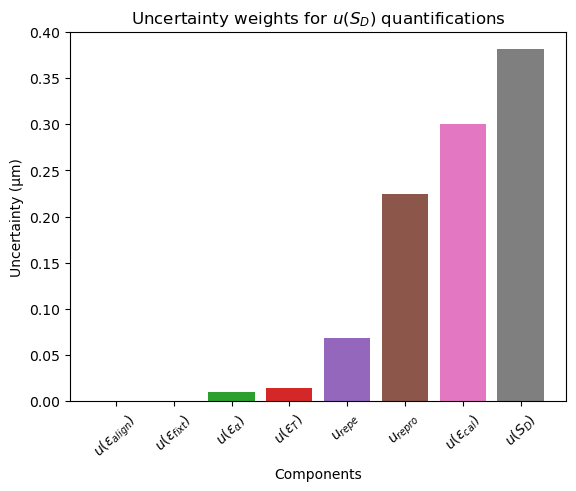

In [23]:
categories_SD = [r'$u(\varepsilon_{align})$', r'$u(\varepsilon_{fixt})$', r'$u(\varepsilon_{\alpha})$', r'$u(\varepsilon_{T})$', r'$u_{repe}$',
                 r'$u_{repro}$', r'$u(\varepsilon_{cal})$', r'$u(S_D)$']

weights_SD = [1e3*u_ep_align, 1e3*u_ep_fixt,1e3*u_ep_alpha, 1e3*u_ep_T, 1e3*u_repe, 1e3*u_repr, 1e3*u_ep_cal, 1e3*uncer_SD]

fig, ax_SD = plt.subplots()
uncertainty_color(categories_SD, weights_SD, ax_SD)
ax_SD.set_xlabel('Components')
ax_SD.set_ylabel('Uncertainty (µm)')
ax_SD.set_title('Uncertainty weights for '+r'$u(S_D)$'+' quantifications')
plt.xticks(rotation=45)
plt.show()

### Call to template location and sheet *SDE_Test_Uncertainty*

In [24]:
# 1) Path of the excel file of the template
path = r'C:\Users\jchac\OneDrive\Escritorio\Programación\Validación de hojas de cálculo\TMP024\VT-CAL-061323-213365 new JAlfaro.xlsx'

#2) Define the DataFrame of the raw data
df_SDE_TU = pd.read_excel(path, sheet_name='SDE_Test_Uncertainty')

# Define Excel uncertainties
uncer_SD_Excel = df_SDE_TU["Unnamed: 1"][20]
Uncer_SD_Excel = df_SDE_TU["Unnamed: 1"][27]

### Comparison of validation results

In [25]:
# Creation of the report DataFrame
df = pd.DataFrame({
    "Value to validate": [r"$u(S_D)$ / mm",r"$U(S_D)$ / mm"],
    "Excel": [uncer_SD_Excel, Uncer_SD_Excel],
    "Python": [uncer_SD, Uncer_SD]})

df_val = pd.DataFrame({"Are equal?": [df["Excel"][0] == df["Python"][0], df["Excel"][1] == df["Python"][1]]})

df["Are equal?"] = df_val.values.copy()

# Apply styles to the DataFrame
styled_df_SDE_TU_Validation = df.style.applymap(highlight_cells)

# Display the DataFrame with styles
styled_df_SDE_TU_Validation

,Value to validate,Excel,Python,Are equal?
0,$u(S_D)$ / mm,0.000381,0.000381,True
1,$U(S_D)$ / mm,0.000762,0.000762,True


## Validation of the uncertainty calculation of the sheet: *E_Graph*

### Theory:
*Test uncertainty calculation according to:*
VDI/VDE 2617 Part 1.3 - Computed tomography in dimensional measurement Guideline for the application of DIN EN ISO 10360 for coordinate measuring machines with CT sensors.

The length measurement error $E$ is obtained from the difference between the test length $L_{measured}$ and the calibrated sphere distance $L_{calibrated}$ plus the signed diameter error $P_S$ and the probing error $P_F$. This relationship can be illustrated by the following equation:

$$
E = L_{measured} - L_{calibrated} + P_S + [sgn(L_{measured} - L_{calibrated} + P_S)]\cdot P_F
$$

con $S_D = L_{measured} - L_{calibrated}$

$$
E = S_D + P_S + [sgn(S_D + P_S)]\cdot P_F
$$

### The values of PS and PF are called

In [26]:
# 1) Path of the excel file of the template
path = r'C:\Users\jchac\OneDrive\Escritorio\Programación\Validación de hojas de cálculo\TMP024\VT-CAL-061323-213365 new JAlfaro.xlsx'

#2) Define the DataFrame of the raw data
df_PSPF_values = pd.read_excel(path, sheet_name='PSPF_Input_Measurements')

### Errors are calculated

In [27]:
# Necesito crear DF con solo PS y PF con el tamaño de la cantidad de errores a tener

# Generate the array that will contain the PS and PF values
PS_1 = pd.DataFrame(df_PSPF_values['P_S (µm)'][0]*np.ones(len(df_SD_Graph['x'])))/1000
PS_2 = pd.DataFrame(df_PSPF_values['P_S (µm)'][1]*np.ones(len(df_SD_Graph['x'])))/1000
PS_3 = pd.DataFrame(df_PSPF_values['P_S (µm)'][2]*np.ones(len(df_SD_Graph['x'])))/1000
PS_4 = pd.DataFrame(df_PSPF_values['P_S (µm)'][3]*np.ones(len(df_SD_Graph['x'])))/1000
PS_5 = pd.DataFrame(df_PSPF_values['P_S (µm)'][4]*np.ones(len(df_SD_Graph['x'])))/1000
PS_6 = pd.DataFrame(df_PSPF_values['P_S (µm)'][5]*np.ones(len(df_SD_Graph['x'])))/1000
PF_1 = pd.DataFrame(df_PSPF_values['P_F corregido (µm)'][0]*np.ones(len(df_SD_Graph['x'])))/1000
PF_2 = pd.DataFrame(df_PSPF_values['P_F corregido (µm)'][1]*np.ones(len(df_SD_Graph['x'])))/1000
PF_3 = pd.DataFrame(df_PSPF_values['P_F corregido (µm)'][2]*np.ones(len(df_SD_Graph['x'])))/1000
PF_4 = pd.DataFrame(df_PSPF_values['P_F corregido (µm)'][3]*np.ones(len(df_SD_Graph['x'])))/1000
PF_5 = pd.DataFrame(df_PSPF_values['P_F corregido (µm)'][4]*np.ones(len(df_SD_Graph['x'])))/1000
PF_6 = pd.DataFrame(df_PSPF_values['P_F corregido (µm)'][5]*np.ones(len(df_SD_Graph['x'])))/1000

# Errors are defined when combining the amount of SD and PS and PF
PSPF1_SD1 = pd.DataFrame({'PSPF1_SD1': df_SD["Deviation 1"].reset_index(drop=True) + PS_1[0] + 
                          np.sign(df_SD["Deviation 1"].reset_index(drop=True) + PS_1[0])*PF_1[0]})
PSPF1_SD2 = pd.DataFrame({'PSPF1_SD2': df_SD["Deviation 2"].reset_index(drop=True) + PS_1[0] + 
                          np.sign(df_SD["Deviation 2"].reset_index(drop=True) + PS_1[0])*PF_1[0]})
PSPF1_SD3 = pd.DataFrame({'PSPF1_SD3': df_SD["Deviation 3"].reset_index(drop=True) + PS_1[0] + 
                          np.sign(df_SD["Deviation 3"].reset_index(drop=True) + PS_1[0])*PF_1[0]})

PSPF2_SD1 = pd.DataFrame({'PSPF2_SD1': df_SD["Deviation 1"].reset_index(drop=True) + PS_2[0] + 
                          np.sign(df_SD["Deviation 1"].reset_index(drop=True) + PS_2[0])*PF_2[0]})
PSPF2_SD2 = pd.DataFrame({'PSPF2_SD2': df_SD["Deviation 2"].reset_index(drop=True) + PS_2[0] + 
                          np.sign(df_SD["Deviation 2"].reset_index(drop=True) + PS_2[0])*PF_2[0]})
PSPF2_SD3 = pd.DataFrame({'PSPF2_SD3': df_SD["Deviation 3"].reset_index(drop=True) + PS_2[0] + 
                          np.sign(df_SD["Deviation 3"].reset_index(drop=True) + PS_2[0])*PF_2[0]})

PSPF3_SD1 = pd.DataFrame({'PSPF3_SD1': df_SD["Deviation 1"].reset_index(drop=True) + PS_3[0] + 
                          np.sign(df_SD["Deviation 1"].reset_index(drop=True) + PS_3[0])*PF_3[0]})
PSPF3_SD2 = pd.DataFrame({'PSPF3_SD2': df_SD["Deviation 2"].reset_index(drop=True) + PS_3[0] + 
                          np.sign(df_SD["Deviation 2"].reset_index(drop=True) + PS_3[0])*PF_3[0]})
PSPF3_SD3 = pd.DataFrame({'PSPF3_SD3': df_SD["Deviation 3"].reset_index(drop=True) + PS_3[0] + 
                          np.sign(df_SD["Deviation 3"].reset_index(drop=True) + PS_3[0])*PF_3[0]})

PSPF4_SD1 = pd.DataFrame({'PSPF4_SD1': df_SD["Deviation 1"].reset_index(drop=True) + PS_4[0] + 
                          np.sign(df_SD["Deviation 1"].reset_index(drop=True) + PS_4[0])*PF_4[0]})
PSPF4_SD2 = pd.DataFrame({'PSPF4_SD2': df_SD["Deviation 2"].reset_index(drop=True) + PS_4[0] + 
                          np.sign(df_SD["Deviation 2"].reset_index(drop=True) + PS_4[0])*PF_4[0]})
PSPF4_SD3 = pd.DataFrame({'PSPF4_SD3': df_SD["Deviation 3"].reset_index(drop=True) + PS_4[0] + 
                          np.sign(df_SD["Deviation 3"].reset_index(drop=True) + PS_4[0])*PF_4[0]})

PSPF5_SD1 = pd.DataFrame({'PSPF5_SD1': df_SD["Deviation 1"].reset_index(drop=True) + PS_5[0] + 
                          np.sign(df_SD["Deviation 1"].reset_index(drop=True) + PS_5[0])*PF_5[0]})
PSPF5_SD2 = pd.DataFrame({'PSPF5_SD2': df_SD["Deviation 2"].reset_index(drop=True) + PS_5[0] + 
                          np.sign(df_SD["Deviation 2"].reset_index(drop=True) + PS_5[0])*PF_5[0]})
PSPF5_SD3 = pd.DataFrame({'PSPF5_SD3': df_SD["Deviation 3"].reset_index(drop=True) + PS_5[0] + 
                          np.sign(df_SD["Deviation 3"].reset_index(drop=True) + PS_5[0])*PF_5[0]})

PSPF6_SD1 = pd.DataFrame({'PSPF6_SD1': df_SD["Deviation 1"].reset_index(drop=True) + PS_6[0] + 
                          np.sign(df_SD["Deviation 1"].reset_index(drop=True) + PS_6[0])*PF_6[0]})
PSPF6_SD2 = pd.DataFrame({'PSPF6_SD2': df_SD["Deviation 2"].reset_index(drop=True) + PS_6[0] + 
                          np.sign(df_SD["Deviation 2"].reset_index(drop=True) + PS_6[0])*PF_6[0]})
PSPF6_SD3 = pd.DataFrame({'PSPF6_SD3': df_SD["Deviation 3"].reset_index(drop=True) + PS_6[0] + 
                          np.sign(df_SD["Deviation 3"].reset_index(drop=True) + PS_6[0])*PF_6[0]})

### Errors are called from Excel

In [28]:
# I call the values of the errors
df_E_values = pd.read_excel(path, sheet_name='E_Graph').head(41)

# Remove rows that are not of interest
df_E_values.drop([0,1,2], inplace=True)
df_E_values.drop([32,34], inplace=True)

# Remove columns that are not of interest
df_E_values.drop(df_E_values.columns[0:16], axis=1, inplace=True)
df_E_values.drop(df_E_values.columns[19:], axis=1, inplace=True)
df_E_values = df_E_values.set_axis(df_E_values.iloc[0], axis=1)
df_E_values.drop(3, inplace=True)

### Conditionals are evaluated

In [29]:
PSPF1_SD1_val =  df_E_values['PSPF1_SD1'].reset_index(drop = True) == PSPF1_SD1['PSPF1_SD1']
PSPF1_SD2_val =  df_E_values['PSPF1_SD2'].reset_index(drop = True) == PSPF1_SD2['PSPF1_SD2']
PSPF1_SD3_val =  df_E_values['PSPF1_SD3'].reset_index(drop = True) == PSPF1_SD3['PSPF1_SD3']

PSPF2_SD1_val =  df_E_values['PSPF2_SD1'].reset_index(drop = True) == PSPF2_SD1['PSPF2_SD1']
PSPF2_SD2_val =  df_E_values['PSPF2_SD2'].reset_index(drop = True) == PSPF2_SD2['PSPF2_SD2']
PSPF2_SD3_val =  df_E_values['PSPF2_SD3'].reset_index(drop = True) == PSPF2_SD3['PSPF2_SD3']

PSPF3_SD1_val =  df_E_values['PSPF3_SD1'].reset_index(drop = True) == PSPF3_SD1['PSPF3_SD1']
PSPF3_SD2_val =  df_E_values['PSPF3_SD2'].reset_index(drop = True) == PSPF3_SD2['PSPF3_SD2']
PSPF3_SD3_val =  df_E_values['PSPF3_SD3'].reset_index(drop = True) == PSPF3_SD3['PSPF3_SD3']

PSPF4_SD1_val =  df_E_values['PSPF4_SD1'].reset_index(drop = True) == PSPF4_SD1['PSPF4_SD1']
PSPF4_SD2_val =  df_E_values['PSPF4_SD2'].reset_index(drop = True) == PSPF4_SD2['PSPF4_SD2']
PSPF4_SD3_val =  df_E_values['PSPF4_SD3'].reset_index(drop = True) == PSPF4_SD3['PSPF4_SD3']

PSPF5_SD1_val =  df_E_values['PSPF5_SD1'].reset_index(drop = True) == PSPF5_SD1['PSPF5_SD1']
PSPF5_SD2_val =  df_E_values['PSPF5_SD2'].reset_index(drop = True) == PSPF5_SD2['PSPF5_SD2']
PSPF5_SD3_val =  df_E_values['PSPF5_SD3'].reset_index(drop = True) == PSPF5_SD3['PSPF5_SD3']

PSPF6_SD1_val =  df_E_values['PSPF6_SD1'].reset_index(drop = True) == PSPF6_SD1['PSPF6_SD1']
PSPF6_SD2_val =  df_E_values['PSPF6_SD2'].reset_index(drop = True) == PSPF6_SD2['PSPF6_SD2']
PSPF6_SD3_val =  df_E_values['PSPF6_SD3'].reset_index(drop = True) == PSPF6_SD3['PSPF6_SD3']

### Creation of the DataFrame

In [30]:
# The DataFrame is created following the syntax of the Pandas library.
charac = pd.DataFrame(df_E_values['Name'], columns =['Name'], dtype = str)

validation_PSPF1_SD1 = pd.DataFrame(PSPF1_SD1_val, columns =["PSPF1_SD1"], dtype = str)
validation_PSPF1_SD2 = pd.DataFrame(PSPF1_SD2_val, columns =["PSPF1_SD2"], dtype = str)
validation_PSPF1_SD3 = pd.DataFrame(PSPF1_SD3_val, columns =["PSPF1_SD3"], dtype = str)

validation_PSPF2_SD1 = pd.DataFrame(PSPF2_SD1_val, columns =["PSPF2_SD1"], dtype = str)
validation_PSPF2_SD2 = pd.DataFrame(PSPF2_SD2_val, columns =["PSPF2_SD2"], dtype = str)
validation_PSPF2_SD3 = pd.DataFrame(PSPF2_SD3_val, columns =["PSPF2_SD3"], dtype = str)

validation_PSPF3_SD1 = pd.DataFrame(PSPF3_SD1_val, columns =["PSPF3_SD1"], dtype = str)
validation_PSPF3_SD2 = pd.DataFrame(PSPF3_SD2_val, columns =["PSPF3_SD2"], dtype = str)
validation_PSPF3_SD3 = pd.DataFrame(PSPF3_SD3_val, columns =["PSPF3_SD3"], dtype = str)

validation_PSPF4_SD1 = pd.DataFrame(PSPF4_SD1_val, columns =["PSPF4_SD1"], dtype = str)
validation_PSPF4_SD2 = pd.DataFrame(PSPF4_SD2_val, columns =["PSPF4_SD2"], dtype = str)
validation_PSPF4_SD3 = pd.DataFrame(PSPF4_SD3_val, columns =["PSPF4_SD3"], dtype = str)

validation_PSPF5_SD1 = pd.DataFrame(PSPF5_SD1_val, columns =["PSPF5_SD1"], dtype = str)
validation_PSPF5_SD2 = pd.DataFrame(PSPF5_SD2_val, columns =["PSPF5_SD2"], dtype = str)
validation_PSPF5_SD3 = pd.DataFrame(PSPF5_SD3_val, columns =["PSPF5_SD3"], dtype = str)

validation_PSPF6_SD1 = pd.DataFrame(PSPF6_SD1_val, columns =["PSPF6_SD1"], dtype = str)
validation_PSPF6_SD2 = pd.DataFrame(PSPF6_SD2_val, columns =["PSPF6_SD2"], dtype = str)
validation_PSPF6_SD3 = pd.DataFrame(PSPF6_SD3_val, columns =["PSPF6_SD3"], dtype = str)

E_Validation = charac.reset_index(drop=True).copy()

E_Validation["PSPF1_SD1 of TMP024 = PSPF1_SD1 of Python?"] = validation_PSPF1_SD1.values.copy()
E_Validation["PSPF1_SD2 of TMP024 = PSPF1_SD2 of Python?"] = validation_PSPF1_SD2.values.copy()
E_Validation["PSPF1_SD3 of TMP024 = PSPF1_SD3 of Python?"] = validation_PSPF1_SD3.values.copy()

E_Validation["PSPF2_SD1 of TMP024 = PSPF2_SD1 of Python?"] = validation_PSPF2_SD1.values.copy()
E_Validation["PSPF2_SD2 of TMP024 = PSPF2_SD2 of Python?"] = validation_PSPF2_SD2.values.copy()
E_Validation["PSPF2_SD3 of TMP024 = PSPF2_SD3 of Python?"] = validation_PSPF2_SD3.values.copy()

E_Validation["PSPF3_SD1 of TMP024 = PSPF3_SD1 of Python?"] = validation_PSPF3_SD1.values.copy()
E_Validation["PSPF3_SD2 of TMP024 = PSPF3_SD2 of Python?"] = validation_PSPF3_SD2.values.copy()
E_Validation["PSPF3_SD3 of TMP024 = PSPF3_SD3 of Python?"] = validation_PSPF3_SD3.values.copy()

E_Validation["PSPF4_SD1 of TMP024 = PSPF4_SD1 of Python?"] = validation_PSPF4_SD1.values.copy()
E_Validation["PSPF4_SD2 of TMP024 = PSPF4_SD2 of Python?"] = validation_PSPF4_SD2.values.copy()
E_Validation["PSPF4_SD3 of TMP024 = PSPF4_SD3 of Python?"] = validation_PSPF4_SD3.values.copy()

E_Validation["PSPF5_SD1 of TMP024 = PSPF5_SD1 of Python?"] = validation_PSPF5_SD1.values.copy()
E_Validation["PSPF5_SD2 of TMP024 = PSPF5_SD2 of Python?"] = validation_PSPF5_SD2.values.copy()
E_Validation["PSPF5_SD3 of TMP024 = PSPF5_SD3 of Python?"] = validation_PSPF5_SD3.values.copy()

E_Validation["PSPF6_SD1 of TMP024 = PSPF6_SD1 of Python?"] = validation_PSPF6_SD1.values.copy()
E_Validation["PSPF6_SD2 of TMP024 = PSPF6_SD2 of Python?"] = validation_PSPF6_SD2.values.copy()
E_Validation["PSPF6_SD3 of TMP024 = PSPF6_SD3 of Python?"] = validation_PSPF6_SD3.values.copy()


E_Validation_color = E_Validation.style.applymap(highlight_cells)

E_Validation_color

,Name,PSPF1_SD1 of TMP024 = PSPF1_SD1 of Python?,PSPF1_SD2 of TMP024 = PSPF1_SD2 of Python?,PSPF1_SD3 of TMP024 = PSPF1_SD3 of Python?,PSPF2_SD1 of TMP024 = PSPF2_SD1 of Python?,PSPF2_SD2 of TMP024 = PSPF2_SD2 of Python?,PSPF2_SD3 of TMP024 = PSPF2_SD3 of Python?,PSPF3_SD1 of TMP024 = PSPF3_SD1 of Python?,PSPF3_SD2 of TMP024 = PSPF3_SD2 of Python?,PSPF3_SD3 of TMP024 = PSPF3_SD3 of Python?,PSPF4_SD1 of TMP024 = PSPF4_SD1 of Python?,PSPF4_SD2 of TMP024 = PSPF4_SD2 of Python?,PSPF4_SD3 of TMP024 = PSPF4_SD3 of Python?,PSPF5_SD1 of TMP024 = PSPF5_SD1 of Python?,PSPF5_SD2 of TMP024 = PSPF5_SD2 of Python?,PSPF5_SD3 of TMP024 = PSPF5_SD3 of Python?,PSPF6_SD1 of TMP024 = PSPF6_SD1 of Python?,PSPF6_SD2 of TMP024 = PSPF6_SD2 of Python?,PSPF6_SD3 of TMP024 = PSPF6_SD3 of Python?
0,E1_15,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,E1_22,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,E1_8,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,E15_22,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,E15_8,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,E3_16,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
6,E3_22,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7,E3_10,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8,E16_22,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9,E16_10,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


### Uncertainty weights graph for: $u(E)$

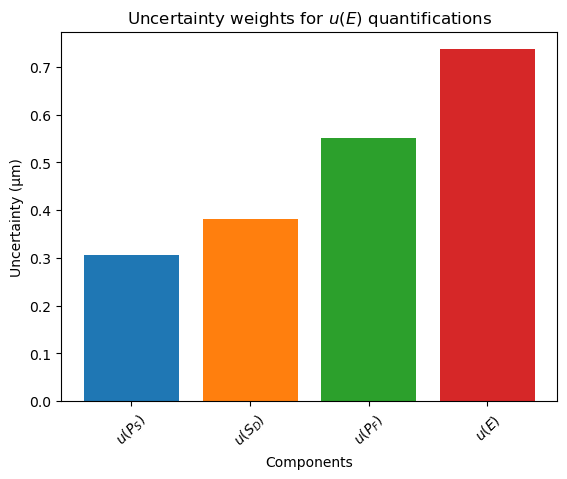

In [31]:
categories_E = [r'$u(P_S)$', r'$u(S_D)$', r'$u(P_F)$', r'$u(E)$']
uncer_E = np.sqrt(uncer_PS**2 + uncer_PF**2 + uncer_SD**2)
weights_E = [1e3*uncer_PS, 1e3*uncer_SD, 1e3*uncer_PF, 1e3*uncer_E]

fig, ax_E = plt.subplots()
uncertainty_color(categories_E, weights_E, ax_E)
ax_E.set_xlabel('Components')
ax_E.set_ylabel('Uncertainty (µm)')
ax_E.set_title('Uncertainty weights for '+r'$u(E)$'+' quantifications')
plt.xticks(rotation=45)
plt.show()